In [274]:
import numpy as np
import pandas as pd

data=pd.read_csv('student-mat.csv', sep=';')
data.head(10)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


In [275]:
#Encoding of binary features 

data['school']=data['school'].apply(lambda x:1 if x=='GP' else(0 if x=='MS' else np.nan))
data['sex']=data['sex'].apply(lambda x:1 if x=='M' else(0 if x=='F' else np.nan))
data['address']=data['address'].apply(lambda x:1 if x=='U' else(0 if x=='R' else np.nan))
data['famsize']=data['famsize'].apply(lambda x:1 if x=='GT3' else(0 if x=='LE3' else np.nan))
data['Pstatus']=data['Pstatus'].apply(lambda x:1 if x=='T' else(0 if x=='A' else np.nan))

#Encoding of nominal features 
nominal_features=pd.DataFrame()
nominal_features['Mjob']=data['Mjob']
nominal_features['Fjob']=data['Fjob']
nominal_features['reason']=data['reason']
nominal_features['guardian']=data['guardian']

dumies=pd.get_dummies(nominal_features)
dumies.head(10)



,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
2,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
3,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
4,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0
5,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0
6,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0
7,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0
8,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0
9,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0


In [276]:
new_data=data.drop(['Mjob','Fjob','reason','guardian'], axis=1)
data=pd.concat([new_data, dumies], axis=1)


#Encoding of true-false features 
true_false_features=["schoolsup","famsup","paid","activities","nursery","higher","internet","romantic"]
for i in true_false_features:
    data[i]=data[i].apply(lambda x : 1 if x=='yes' else(0 if x=='no' else np.nan))
    
data.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,1,0,18,1,1,0,4,4,2,2,...,0,0,1,1,0,0,0,0,1,0
1,1,0,17,1,1,1,1,1,1,2,...,1,0,0,1,0,0,0,1,0,0
2,1,0,15,1,0,1,1,1,1,2,...,1,0,0,0,0,1,0,0,1,0
3,1,0,15,1,1,1,4,2,1,3,...,0,1,0,0,1,0,0,0,1,0
4,1,0,16,1,1,1,3,3,1,2,...,1,0,0,0,1,0,0,1,0,0
5,1,1,16,1,0,1,4,3,1,2,...,1,0,0,0,0,0,1,0,1,0
6,1,1,16,1,0,1,2,2,1,2,...,1,0,0,0,1,0,0,0,1,0
7,1,0,17,1,1,0,4,4,2,2,...,0,0,1,0,1,0,0,0,1,0
8,1,1,15,1,0,0,3,2,1,2,...,1,0,0,0,1,0,0,0,1,0
9,1,1,15,1,1,1,3,4,1,2,...,1,0,0,0,1,0,0,0,1,0


In [277]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 46 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   school             395 non-null    int64
 1   sex                395 non-null    int64
 2   age                395 non-null    int64
 3   address            395 non-null    int64
 4   famsize            395 non-null    int64
 5   Pstatus            395 non-null    int64
 6   Medu               395 non-null    int64
 7   Fedu               395 non-null    int64
 8   traveltime         395 non-null    int64
 9   studytime          395 non-null    int64
 10  failures           395 non-null    int64
 11  schoolsup          395 non-null    int64
 12  famsup             395 non-null    int64
 13  paid               395 non-null    int64
 14  activities         395 non-null    int64
 15  nursery            395 non-null    int64
 16  higher             395 non-null    int64
 17  internet        

<AxesSubplot:>

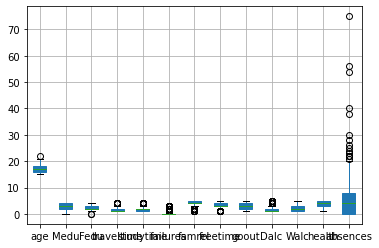

In [278]:
#Discovering outliers

import seaborn as sb
numeric_features=["age","Medu","Fedu","traveltime","studytime","failures","famrel","freetime","goout","Dalc",
                      "Walc","health","absences"]

data.boxplot(numeric_features, patch_artist = True)

In [279]:
# for x in ['absences']:
#     q75,q25 = np.percentile(data.loc[:,x],[75,25])
#     intr_qr = q75-q25
 
#     max = q75+(1.5*intr_qr)
#     min = q25-(1.5*intr_qr)
 
#     data.loc[data[x] < min,x] = np.nan
#     data.loc[data[x] > max,x] = np.nan

In [280]:
data.isnull().sum()

school               0
sex                  0
age                  0
address              0
famsize              0
Pstatus              0
Medu                 0
Fedu                 0
traveltime           0
studytime            0
failures             0
schoolsup            0
famsup               0
paid                 0
activities           0
nursery              0
higher               0
internet             0
romantic             0
famrel               0
freetime             0
goout                0
Dalc                 0
Walc                 0
health               0
absences             0
G1                   0
G2                   0
G3                   0
Mjob_at_home         0
Mjob_health          0
Mjob_other           0
Mjob_services        0
Mjob_teacher         0
Fjob_at_home         0
Fjob_health          0
Fjob_other           0
Fjob_services        0
Fjob_teacher         0
reason_course        0
reason_home          0
reason_other         0
reason_reputation    0
guardian_fa

In [281]:
# for i in ['absences']:
#     data[i]=data[i].fillna(data[i].median()) # outliers
    
    
# data= data.dropna(axis = 0)

<AxesSubplot:>

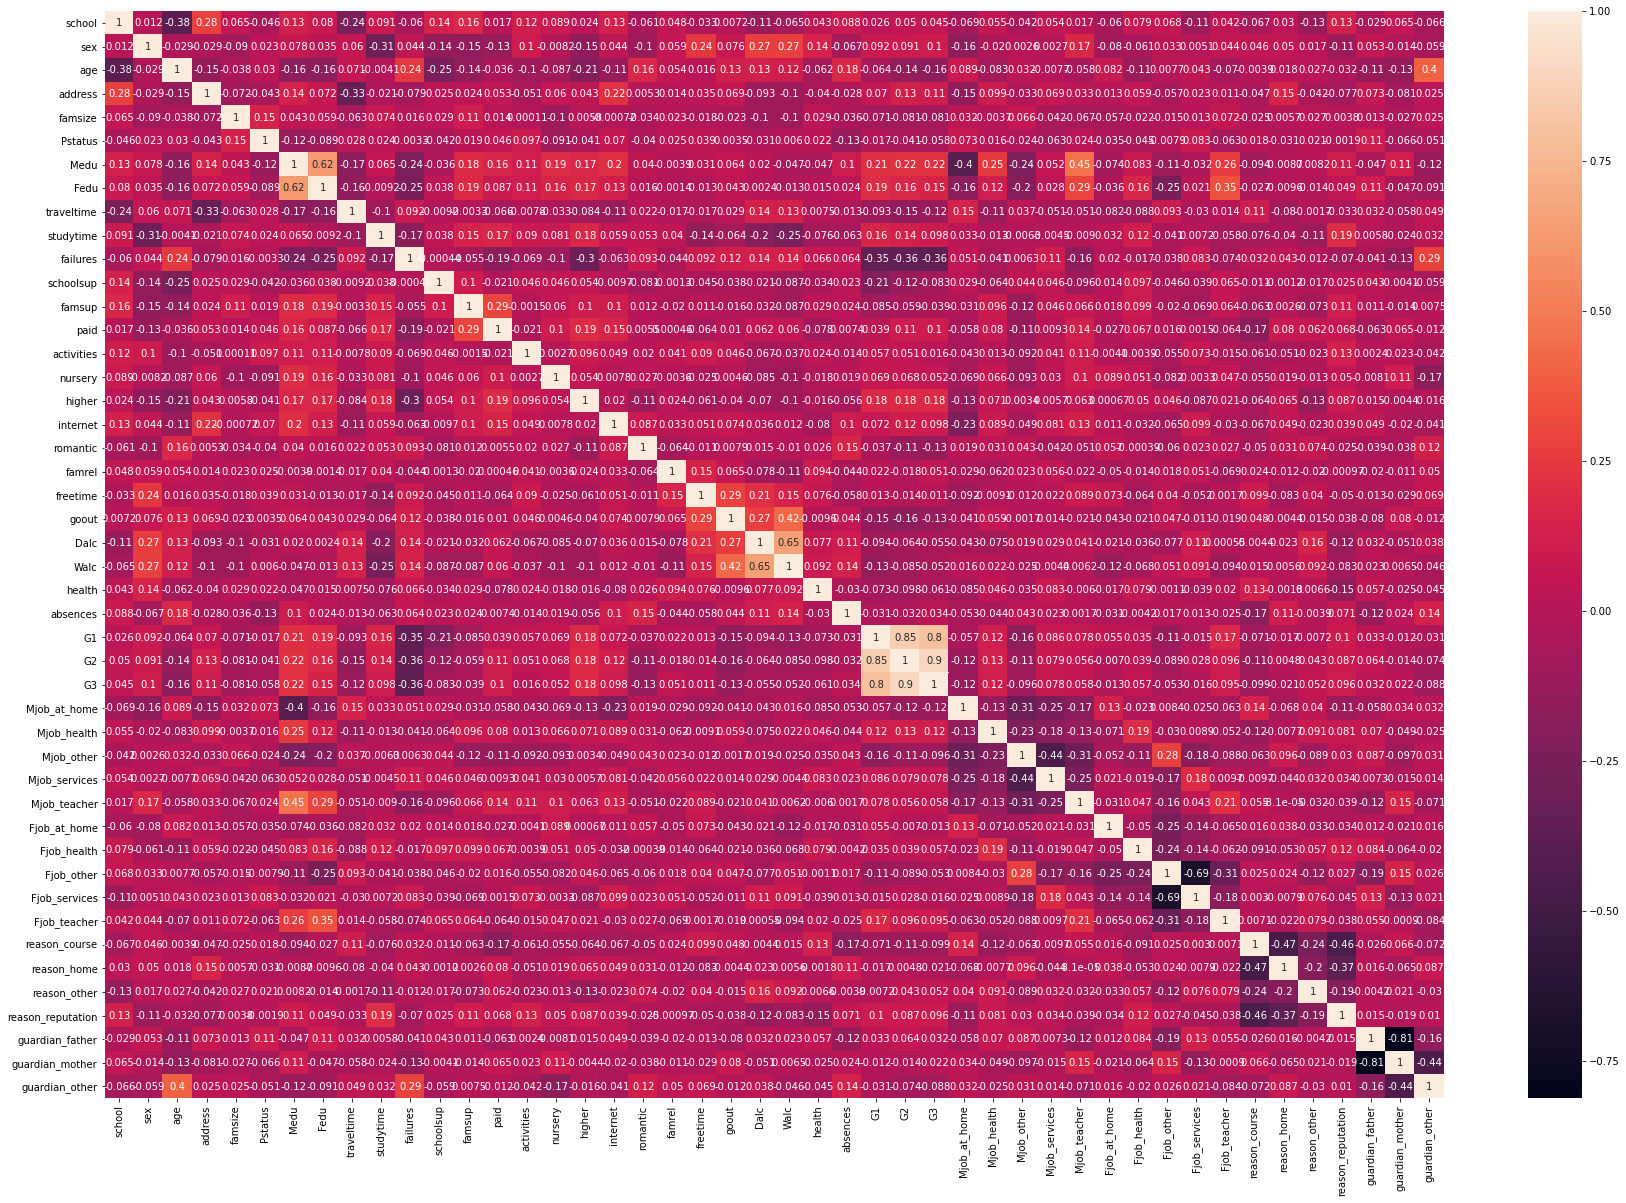

In [282]:
# Correlation Marrix & heat map 

cor=data.corr()

import matplotlib.pyplot as plt

plt.figure(figsize=(30,20))

import seaborn as sb
sb.heatmap(cor, annot=True)

In [283]:
# Split data to features and target
features=data.drop('G3',axis=1)
target=data['G3']


# Droping feature 'activities' from features based on correlation matrix
features=data.drop('activities',axis=1)


from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test=train_test_split(features,target,test_size=0.2,random_state=20)


#Building the model

from sklearn.linear_model import LinearRegression
linR=LinearRegression()
model=linR.fit(x_train, y_train)
pred=model.predict(x_test)

#calculating r2 and mean squared error
from sklearn.metrics import r2_score, mean_squared_error

rmse=np.sqrt(mean_squared_error(y_test,pred))
r2=r2_score(y_test,pred)

print('RMSE :',rmse)
print('R2 :', r2)

#Cross validation
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(linR, features, target, cv=10, scoring='r2')
print('CVS: ', cvs)
print('Mean CVS: ', cvs.mean())

RMSE : 3.127023988536999e-14
R2 : 1.0
CVS:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean CVS:  1.0
